# Conditioning Events

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

Conditioning events must satisfy the following.

* **The conditioning event must be placed in parentheses.**
* The condition must involve at least one `RV`.  Remember that a function or transformation of `RV`s is also an `RV`.
* The conditioning event must involve a comparison operator: `==`, `>`, `<`, `>=`, `<=`

*Example.* Memoryless property of Exponential distributions.

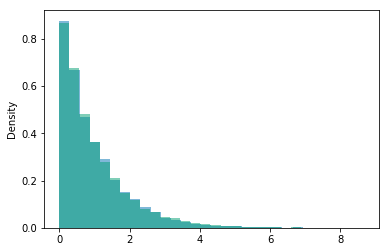

In [7]:
X = RV(Exponential(1))
(X - 5 | (X > 5)).sim(10000).plot()
RV(Exponential(1)).sim(10000).plot()

*Example.* Soccer teams X and Y score goals independently of each other, and the number of goals each team scores has a Poisson distribution with mean 1 for X and mean 2 for Y.  Find the expected number of goals that team X scores given that they score at least as many goals as team Y.

In [8]:
X, Y = RV(Poisson(1) * Poisson(2))
(X | (X >= Y)).sim(10000).mean()

1.6146

### Conditioning on multiple events

Multiple events can be conditioned on using the logical operators

* `~` for not: `(~A)`
* `&` for and: `(A & B)` 
* `|` for or: `(A | B)`.  **Caution: be sure to put parentheses around the conditioning events to avoid confusion between | for conditioning and | for or.**


*Example.* Times between successive earthquakes are independent each having an Exponential distribution with mean 0.5 hour.  Find the conditional distribution of the time (starting now) until the next earthquake occurs, given that exactly 1 earthquake occurs in the next 2 hours. 

Let $X, Y$ be the times between the first two quakes, so that $X$ is the time of the first quake and $X+Y$ is the time of the second.  The event "exactly 1 quake in the next 2 hours" is equivalent to "the first quake occurs within 2 hours", i.e. $(X < 2)$, AND the second quake occurs after 2 hours", i.e $(X + Y >2)$.

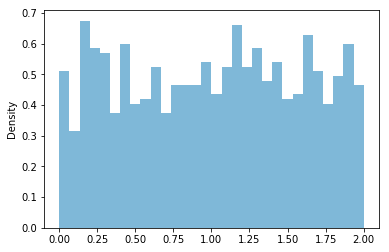

In [9]:
X, Y = RV(Exponential(scale=0.5) ** 2)
(X | ((X < 2) & (X + Y > 2)) ).sim(1000).plot()